### Logistic regression implementation.

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [356]:
#import dataset for binary classification
from sklearn.datasets import make_classification

In [357]:
X,y=make_classification(n_samples=1000,n_features=10, n_classes=2,random_state=42)

In [358]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224


In [359]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

In [360]:
# model training
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [361]:
log_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [362]:
y_pred=log_reg.predict(X_test)

In [363]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

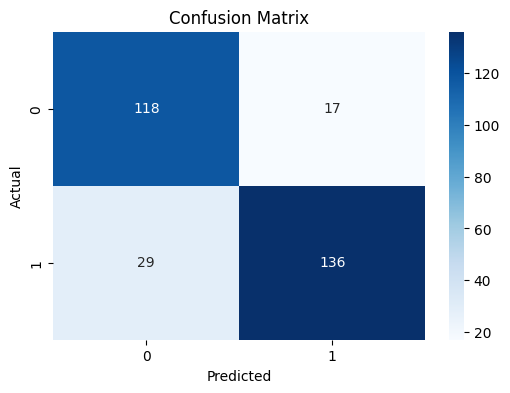

In [364]:
# MODEL EVALUATION
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [365]:
score=accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {score:.2f}')
print('\nClassification Report:\n',classification_report(y_test,y_pred))

Accuracy Score: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



## Hyperparameter tuning and cross validation


In [366]:
model=LogisticRegression()

penalty = ['l1']  
c_score = [0.001,0.01,0.1,1,10,100]
solver = ['liblinear', 'saga'] 


In [367]:
params=dict(penalty=penalty,C=c_score,solver=solver)
params

{'penalty': ['l1'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'solver': ['liblinear', 'saga']}

In [368]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [369]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=model,param_grid=params,cv=cv,n_jobs=-1,scoring='accuracy')


In [370]:
grid_search.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [371]:
grid_search.best_score_

np.float64(0.8742857142857143)

In [372]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [373]:
accuracy_grid=accuracy_score(y_test,grid_search.predict(X_test))
print(f'Accuracy Score from Grid Search CV: {accuracy_grid:.2f}')
classification_report_grid=classification_report(y_test,grid_search.predict(X_test))
print('\nClassification Report from Grid Search CV:\n',classification_report_grid)

Accuracy Score from Grid Search CV: 0.85

Classification Report from Grid Search CV:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       135
           1       0.92      0.81      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



### Randomize SearchCv

In [374]:
model=LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=model,param_distributions=params,cv=cv,n_jobs=-1,scoring='accuracy')
random_search.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_distributions,"{'C': [0.001, 0.01, ...], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [375]:
y_pred_random=random_search.predict(X_test)
y_pred_random

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [376]:
random_search.best_score_

np.float64(0.8742857142857143)

In [377]:
random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}

In [378]:
score_random=accuracy_score(y_test,y_pred_random)
print(f'Accuracy Score from Randomized Search CV: {score_random:.2f}')
classification_report_random=classification_report(y_test,y_pred_random)
print('\nClassification Report from Randomized Search CV:\n',classification_report_random)

Accuracy Score from Randomized Search CV: 0.85

Classification Report from Randomized Search CV:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       135
           1       0.92      0.81      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

